# Portfolio Management and Forecasting with Enhanced Volatility Features

## Introduction
This notebook implements volatility-based feature engineering for forecasting and portfolio optimization.

## 1. Data Fetching

In [1]:
import logging
import pandas as pd
import sys, os
import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from preprocess import load_data, preprocess_data, compute_volatility_index

In [4]:
tsla, bnd, spy = load_data()

In [5]:
tsla = tsla.drop('Price', axis=1)
bnd = bnd.drop('Price', axis=1)
spy = spy.drop('Price', axis=1)

In [6]:
tsla = tsla.dropna()
bnd = bnd.dropna()
spy = spy.dropna()

In [7]:
tsla.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000.0
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500.0
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500.0
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000.0
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500.0


### 2.2 Preprocess each DataFrame

In [8]:
tsla = preprocess_data(tsla)
bnd = preprocess_data(bnd)
spy = preprocess_data(spy)

In [9]:
tsla.head()

,Adj Close,Close,High,Low,Open,Volume,Log Return,20-Day Volatility,50-Day Volatility,Bollinger Upper,Bollinger Lower,ATR
Date,,,,,,,,,,,,
2015-03-17 00:00:00+00:00,12.982000,12.982000,13.247333,12.929333,13.028667,73411500.0,-0.004969,0.022355,0.022555,13.371310,13.281889,1.584667
2015-03-18 00:00:00+00:00,13.380667,13.380667,13.392000,12.874000,12.997333,72313500.0,0.030247,0.023518,0.022241,13.361137,13.267063,1.415333
2015-03-19 00:00:00+00:00,13.043333,13.043333,13.639333,12.968667,13.466667,127128000.0,-0.025534,0.022540,0.022489,13.305646,13.215487,1.258000
2015-03-20 00:00:00+00:00,13.205333,13.205333,13.266000,13.041333,13.163333,64042500.0,0.012344,0.021838,0.022574,13.240810,13.153457,1.258000
2015-03-23 00:00:00+00:00,13.308667,13.308667,13.366667,13.164667,13.233333,39474000.0,0.007795,0.019670,0.022610,13.210772,13.132094,1.258000


### 2.3. Calculate the Volatility Index across assets

In [10]:
vol_index = compute_volatility_index(tsla, bnd, spy)

In [11]:
tsla.head()

,Adj Close,Close,High,Low,Open,Volume,Log Return,20-Day Volatility,50-Day Volatility,Bollinger Upper,Bollinger Lower,ATR
Date,,,,,,,,,,,,
2015-03-17 00:00:00+00:00,12.982000,12.982000,13.247333,12.929333,13.028667,73411500.0,-0.004969,0.022355,0.022555,13.371310,13.281889,1.584667
2015-03-18 00:00:00+00:00,13.380667,13.380667,13.392000,12.874000,12.997333,72313500.0,0.030247,0.023518,0.022241,13.361137,13.267063,1.415333
2015-03-19 00:00:00+00:00,13.043333,13.043333,13.639333,12.968667,13.466667,127128000.0,-0.025534,0.022540,0.022489,13.305646,13.215487,1.258000
2015-03-20 00:00:00+00:00,13.205333,13.205333,13.266000,13.041333,13.163333,64042500.0,0.012344,0.021838,0.022574,13.240810,13.153457,1.258000
2015-03-23 00:00:00+00:00,13.308667,13.308667,13.366667,13.164667,13.233333,39474000.0,0.007795,0.019670,0.022610,13.210772,13.132094,1.258000


## 2. Model Training and Forecasting with Volatility Features

In [12]:
from modeling import train_arima, train_sarimax, train_lstm, evaluate_model
from forecasting import generate_forecast, plot_forecast, plot_all_forecasts

In [13]:
# Select Tesla's data for forecasting
tsla_log_return = tsla['Log Return'].dropna()
volatility_data = tsla[['20-Day Volatility', '50-Day Volatility', 'Bollinger Upper', 'Bollinger Lower', 'ATR']]

In [14]:
# Train models including SARIMAX with volatility data as exogenous
arima_model = train_arima(tsla_log_return, order=(5, 1, 0))
sarimax_model = train_sarimax(tsla_log_return, seasonal_order=(1, 1, 1, 12), exog=volatility_data)
lstm_model = train_lstm(tsla_log_return, epochs=5)

c:\Users\Blen\OneDrive\Desktop\10Academy\PortfolioManagement\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Blen\OneDrive\Desktop\10Academy\PortfolioManagement\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Blen\OneDrive\Desktop\10Academy\PortfolioManagement\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Blen\OneDrive\Desktop\10Academy\PortfolioManagement\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model

In [15]:
# Generate 6-month forecasts for each model
import numpy as np
# Generate 6-month forecasts for each model
arima_forecast = generate_forecast(arima_model, steps=126)
sarimax_forecast = generate_forecast(sarimax_model, steps=126, exog=volatility_data[-126:])
lstm_forecast = lstm_model.predict(np.array(tsla_log_return[-126:]).reshape(-1, 1, 1))

c:\Users\Blen\OneDrive\Desktop\10Academy\PortfolioManagement\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Blen\OneDrive\Desktop\10Academy\PortfolioManagement\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [16]:
# Evaluate models using MAE, RMSE, and MAPE
arima_mae, arima_rmse, arima_mape = evaluate_model(tsla_log_return[-126:], arima_forecast)
sarimax_mae, sarimax_rmse, sarimax_mape = evaluate_model(tsla_log_return[-126:], sarimax_forecast)
lstm_mae, lstm_rmse, lstm_mape = evaluate_model(tsla_log_return[-126:], lstm_forecast)

In [17]:
# Print evaluation metrics
print("ARIMA Metrics: MAE:", arima_mae, "RMSE:", arima_rmse, "MAPE:", arima_mape)
print("SARIMAX Metrics: MAE:", sarimax_mae, "RMSE:", sarimax_rmse, "MAPE:", sarimax_mape)
print("LSTM Metrics: MAE:", lstm_mae, "RMSE:", lstm_rmse, "MAPE:", lstm_mape)

ARIMA Metrics: MAE: 0.02894836840092351 RMSE: 0.03963384598595796 MAPE: 2.9662084158423294
SARIMAX Metrics: MAE: 0.03362194329741109 RMSE: 0.044834373038722536 MAPE: 4.420296692116887
LSTM Metrics: MAE: 0.027513782310032202 RMSE: 0.03920716159010384 MAPE: 1.3391782123340883


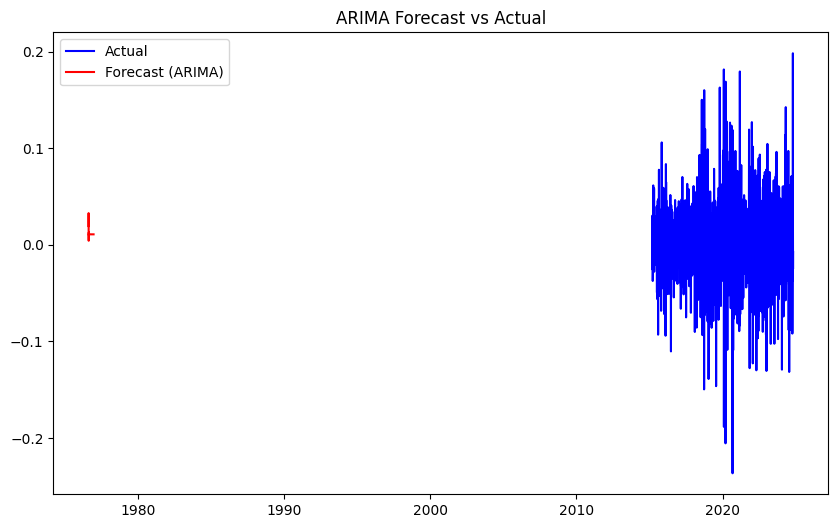

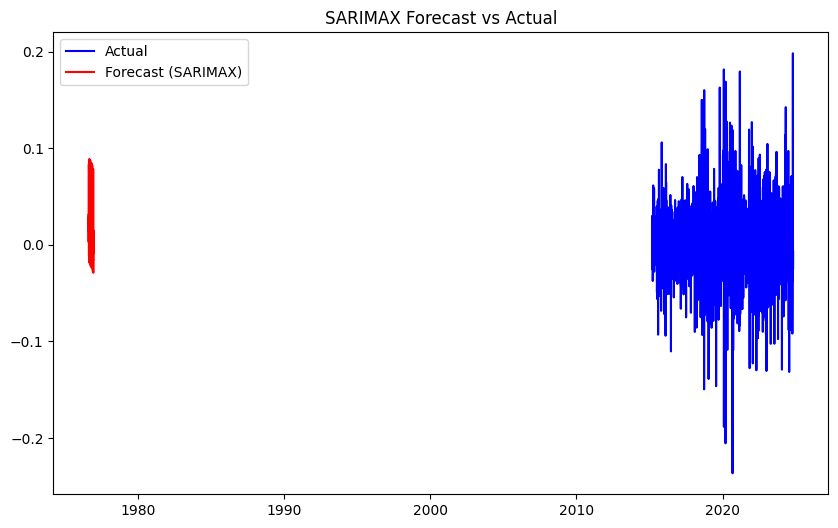

AttributeError: 'numpy.ndarray' object has no attribute 'index'

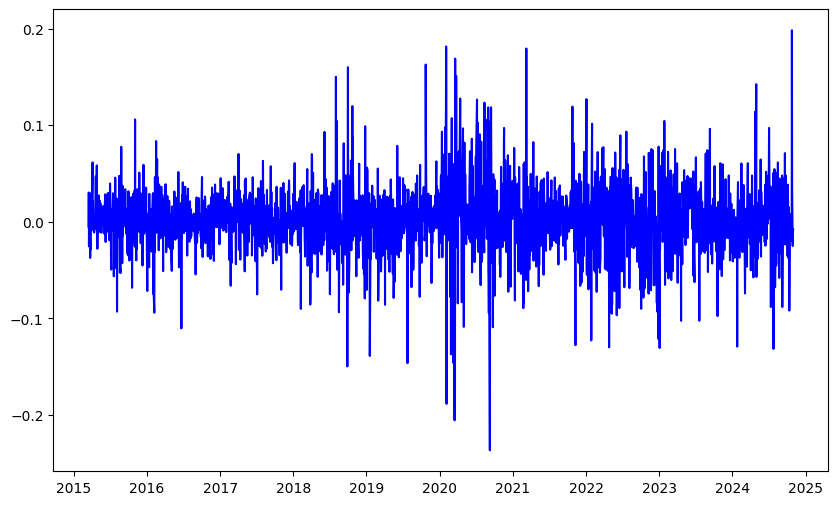

In [35]:
# Plot all model forecasts
plot_forecast(tsla_log_return, arima_forecast, 'ARIMA')
plot_forecast(tsla_log_return, sarimax_forecast, 'SARIMAX')
plot_forecast(tsla_log_return, lstm_forecast, 'LSTM')
plot_all_forecasts(tsla_log_return, arima_forecast, sarimax_forecast, lstm_forecast)

In [ ]:
from portfolio_optimization import optimize_portfolio, calculate_portfolio_metrics

# Use closing prices for each asset
close_prices = pd.DataFrame({
    'TSLA': tsla['Adj Close'],
    'BND': bnd['Adj Close'],
    'SPY': spy['Adj Close']
})
returns = close_prices.pct_change().dropna()
optimal_weights = optimize_portfolio(returns)


In [ ]:
optimal_weights

array([0.14120163, 0.47297863, 0.38581974])

In [19]:
from portfolio_optimization import calculate_portfolio_metrics, optimize_portfolio

In [20]:
# Extract only the 'Adj Close' price for each asset
tsla_close = tsla['Adj Close']
bnd_close = bnd['Adj Close']
spy_close = spy['Adj Close']

In [21]:
# Calculate daily returns for each asset
tsla_returns = tsla_close.pct_change().dropna()
bnd_returns = bnd_close.pct_change().dropna()
spy_returns = spy_close.pct_change().dropna()

In [23]:
# Combine all returns into a single DataFrame
asset_returns = pd.concat([tsla_returns, bnd_returns, spy_returns], axis=1)
asset_returns.columns = ['TSLA', 'BND', 'SPY']

In [24]:
# Perform portfolio optimization to maximize the Sharpe ratio
optimal_weights = optimize_portfolio(asset_returns)

In [25]:
# Print optimized portfolio weights
print("Optimized Portfolio Weights:")
print(f"TSLA: {optimal_weights[0]:.2f}, BND: {optimal_weights[1]:.2f}, SPY: {optimal_weights[2]:.2f}")

Optimized Portfolio Weights:
TSLA: 0.14, BND: 0.47, SPY: 0.39


In [26]:
# Calculate portfolio metrics based on the optimized weights
portfolio_return, portfolio_risk, portfolio_sharpe = calculate_portfolio_metrics(asset_returns, optimal_weights)

In [27]:
# Display portfolio metrics
print(f"Portfolio Expected Return: {portfolio_return:.4f}")
print(f"Portfolio Volatility (Risk): {portfolio_risk:.4f}")
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe:.4f}")


Portfolio Expected Return: 0.0005
Portfolio Volatility (Risk): 0.0084
Portfolio Sharpe Ratio: 0.0608


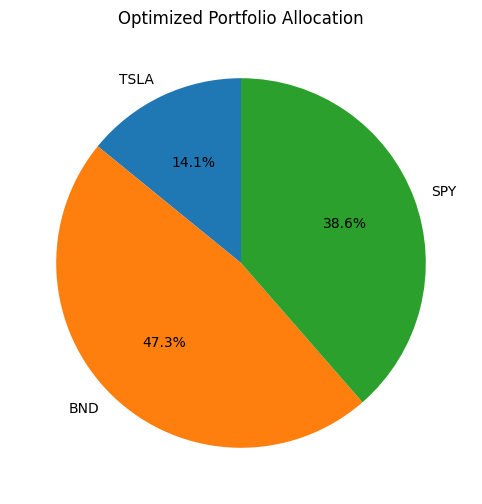

In [32]:
# Plot optimized portfolio allocation
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
assets = ['TSLA', 'BND', 'SPY']
plt.pie(optimal_weights, labels=assets, autopct='%1.1f%%', startangle=90)
plt.title("Optimized Portfolio Allocation")
plt.show()